Question - 2

In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree , DecisionTreeRegressor
import matplotlib.pyplot as plt





In [60]:
data = {
    'price':     ['low', 'low', 'low', 'low', 'med', 'med', 'med', 'med', 'high', 'high', 'high'],
    'maintenance': ['low', 'med', 'low', 'high', 'med', 'med', 'high', 'high', 'med', 'high', 'high'],
    'capacity':  [2, 4, 4, 4, 4, 4, 2, 5, 4, 2, 5],
    'airbag':    ['no', 'yes', 'no', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'yes', 'yes'],
    'profitable':['yes', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'no', 'yes']
}

df = pd.DataFrame(data)


store = {}
for col in ['price', 'maintenance', 'airbag', 'profitable']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    store[col] = le


X = df[['price', 'maintenance', 'capacity', 'airbag']]
y = df['profitable']



In [61]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_split=2, splitter='best')

model.fit(X, y)



DecisionTreeClassifier(criterion='entropy')

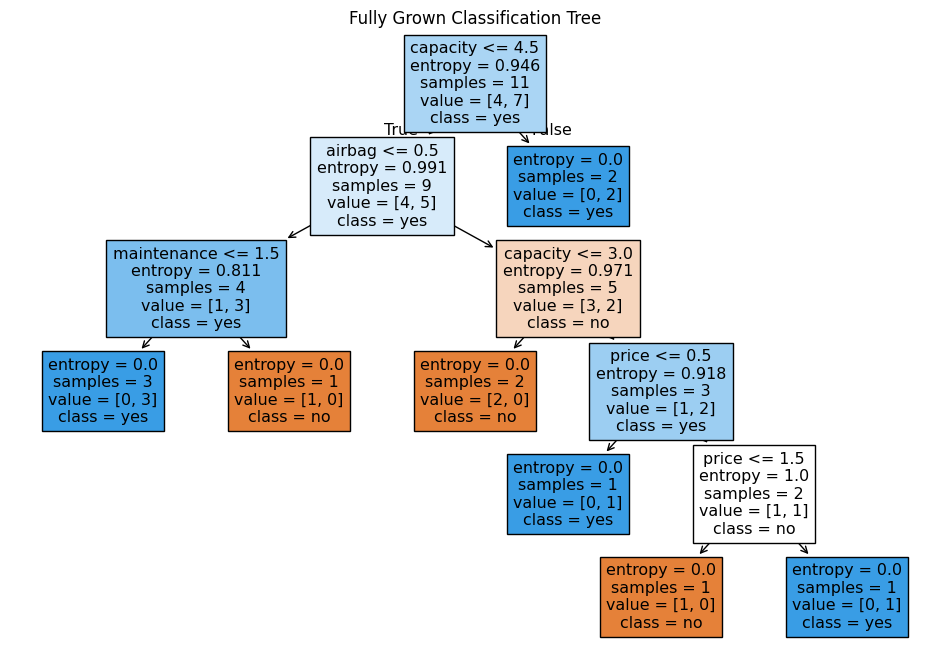

In [62]:

plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=store['profitable'].classes_, filled=True)
plt.title("Fully Grown Classification Tree")
plt.show()

Question - 4

In [63]:

data = {
    'x1': [1, 2, 3, 4, 5, 6, 7, 8],
    'x2': [5, 6, 8, 10, 12, 15, 18, 20],
    'y':  [10, 12, 15, 18, 21, 25, 28, 30]
}

df = pd.DataFrame(data)


X = df[['x1', 'x2']]
y = df['y']





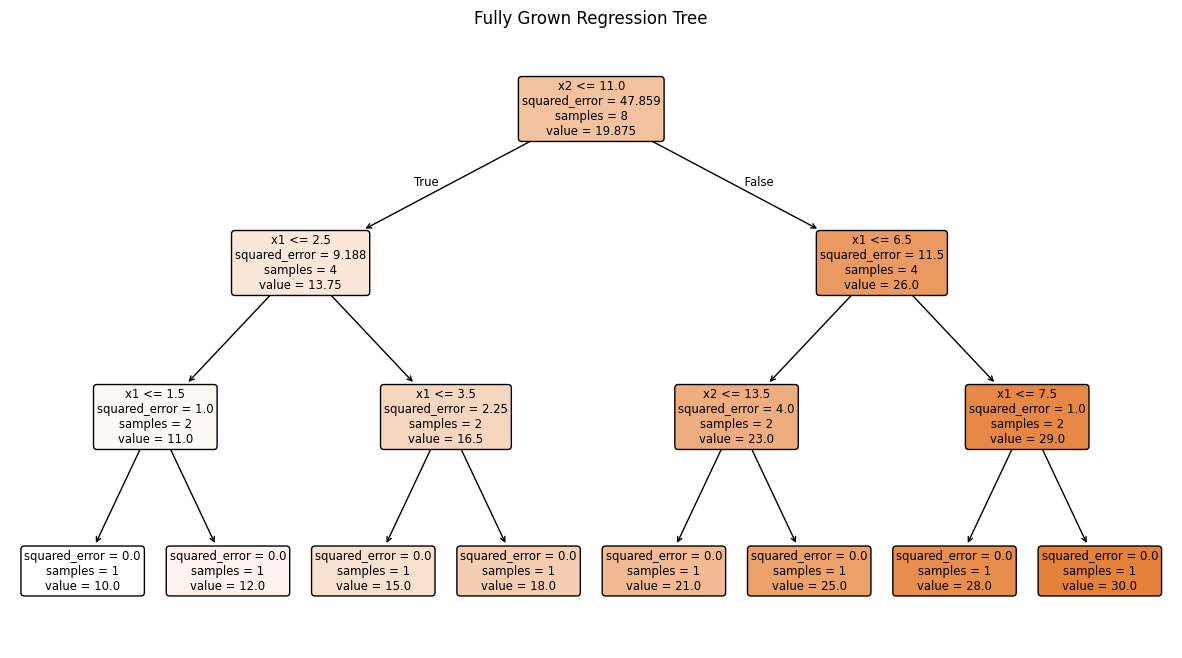

In [64]:
reg_model = DecisionTreeRegressor(criterion='squared_error', max_depth=None, min_samples_split=2)
reg_model.fit(X, y)

plt.figure(figsize=(15, 8))
plot_tree(reg_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Fully Grown Regression Tree")
plt.show()

Question - 7

In [65]:
train=pd.read_csv('/content/A4_train_74e601c5-f446-4f34-a53b-28ce05d1cec4.csv')
train.head()
test=pd.read_csv('/content/A4_test_a4d66d34-6db0-44a4-a7c1-0aa26ab8d705.csv')
test.head()

,Feature1,Feature2,Label
0,0.911100,-0.499137,0.0
1,-1.460326,-0.681642,0.0
2,-1.063950,-1.106004,0.0
3,1.723053,1.159836,1.0
4,-1.078729,1.067450,0.0


In [66]:
X_train=train.drop(['Label'], axis=1)
y_train=train['Label']
X_test=test.drop(['Label'], axis=1)
y_test=test['Label']

In [67]:
clf_full = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=342)
clf_full.fit(X_train, y_train)

DecisionTreeClassifier(random_state=342)

In [68]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

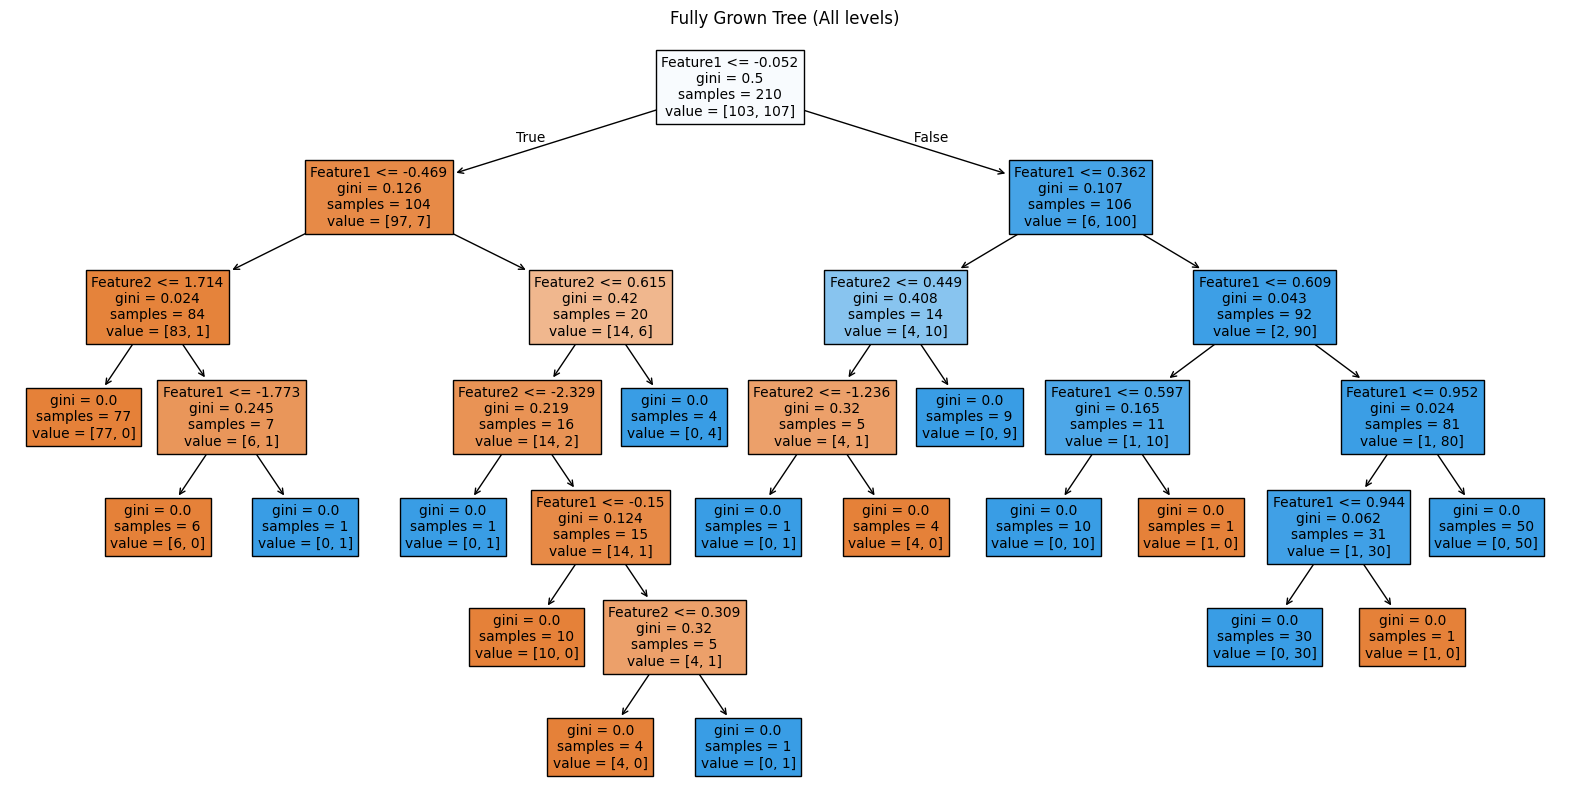

In [69]:
plt.figure(figsize=(20, 10))
plot_tree(clf_full, feature_names=X_train.columns, filled=True, max_depth=9)
plt.title("Fully Grown Tree (All levels)")
plt.show()

In [70]:
depths = list(range(1, clf_full.get_depth() + 1))
sse_per_depth = []

In [71]:
from sklearn.metrics import mean_squared_error
for d in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=d, random_state=0)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    sse = mean_squared_error(y_test, preds) * len(y_test)
    sse_per_depth.append(sse)

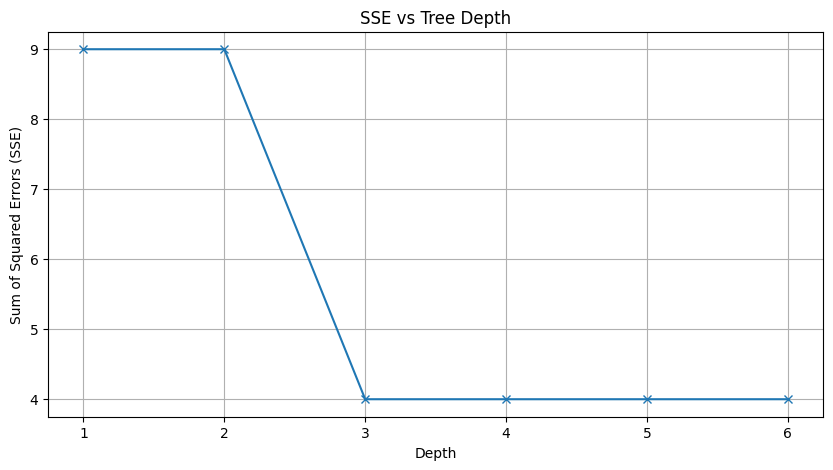

In [72]:
plt.figure(figsize=(10, 5))
plt.plot(depths, sse_per_depth, marker='x')
plt.title("SSE vs Tree Depth")
plt.xlabel("Depth")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.grid(True)
plt.show()


In [73]:
sse_diff = np.diff(sse_per_depth)
optimal_depth = next((i + 1 for i in range(1, len(sse_diff)) if abs(sse_diff[i]) < 1), clf_full.get_depth())
print(f"Optimal Pruning Depth: {optimal_depth}")

Optimal Pruning Depth: 3


In [74]:
clf_pruned = DecisionTreeClassifier(criterion='gini', max_depth=optimal_depth, random_state=342)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=342)

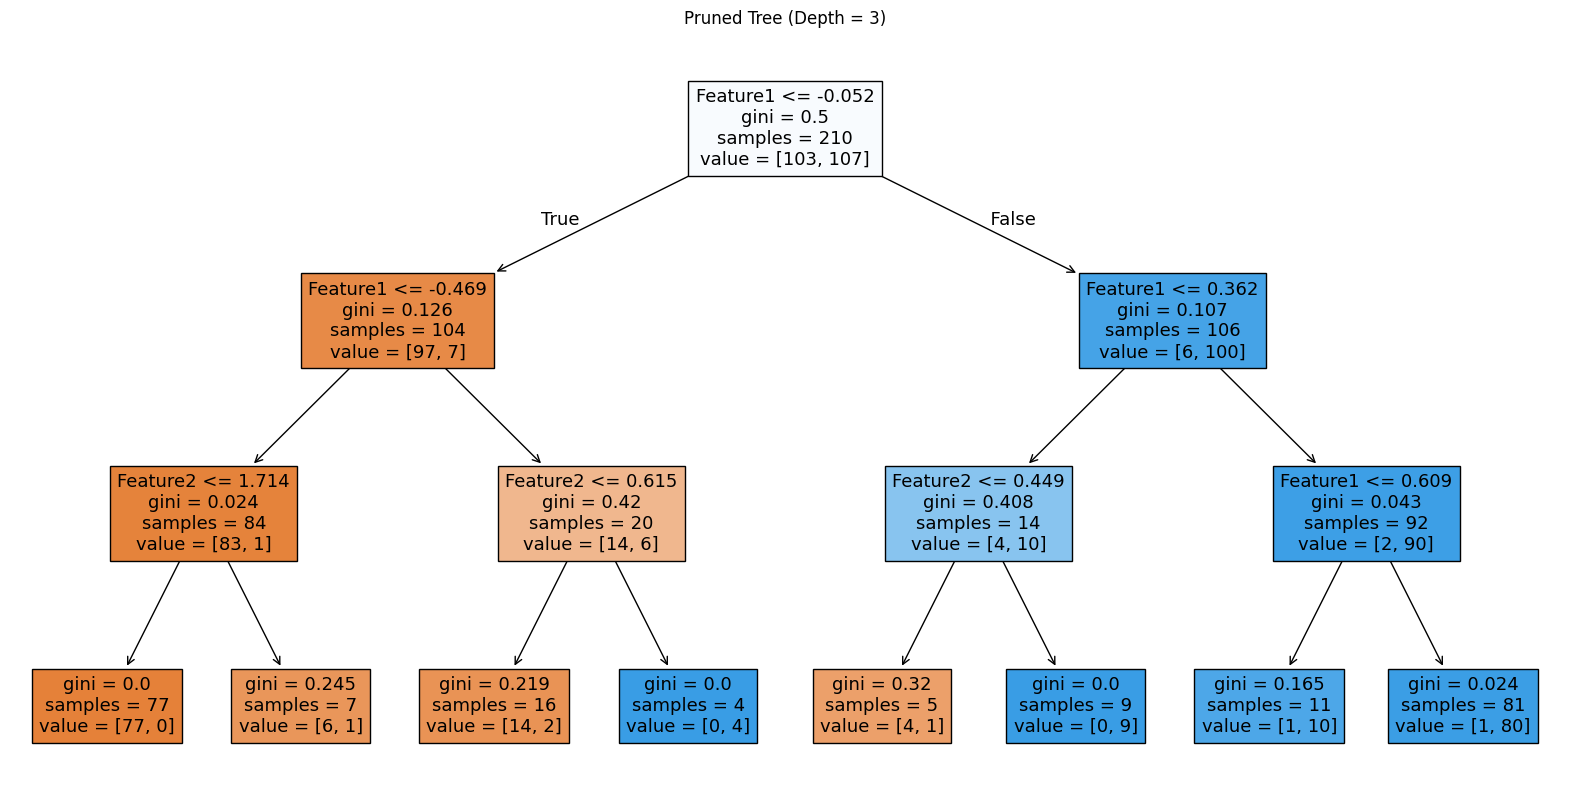

In [75]:
plt.figure(figsize=(20, 10))
plot_tree(clf_pruned, feature_names=X_train.columns, filled=True)
plt.title(f"Pruned Tree (Depth = {optimal_depth})")
plt.show()